In [2]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
        keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
        keepdims=True)
        self.output = probabilities

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y) # type: ignore
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]
        
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )
        
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences) # type: ignore
        return negative_log_likelihoods


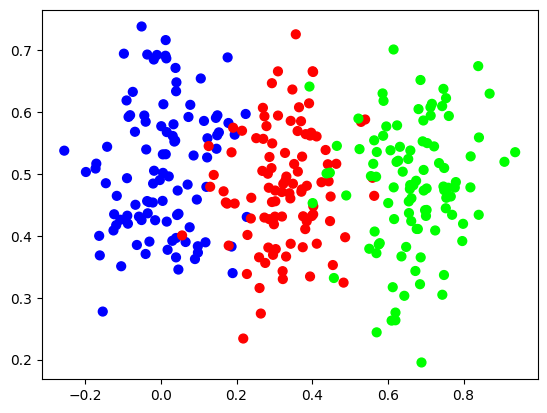

In [3]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [4]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [11]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [13]:
for iteration in range(100000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * np.random.randn(2, 3)
    dense1.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of the training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)
    
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 89866 loss: 1.0773991 acc: 0.3566666666666667


In [14]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(200000):
    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3) # weights = weights + 0.5 <-> weights += 0.5
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)
    
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0999929 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0990008 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0985707 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0980109 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0973969 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.0963662 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0953232 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0940005 acc: 0.3333333333333333
New set of weights found, iteration: 39 loss: 1.0933679 acc: 0.37666666666666665
New set of weights found, iteration: 42 loss: 1.092441 acc: 0.3333333333333333
New set of weights found, iteration: 43 loss: 1.0901031 acc: 0.63
New set of weights found, iteration: 47 loss: 1.0891894 acc: 0.6766666666666666
New set of weights found, iteration: 48 loss: 1.0877237 ac

In [21]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create model
dense1 = Layer_Dense(2, 32) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(32, 32) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_ReLU()
dense3 = Layer_Dense(32, 3) # second dense layer, 3 inputs, 3 outputs
activation3 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
best_dense3_weights = dense3.weights.copy()
best_dense3_biases = dense3.biases.copy()

LR = 100

for iteration in range(100000):
    # Update weights with some small random values
    dense1.weights += LR * np.random.randn(2, 32)
    dense1.biases += LR * np.random.randn(1, 32)
    dense2.weights += LR * np.random.randn(32, 32)
    dense2.biases += LR * np.random.randn(1, 32)
    dense3.weights += LR * np.random.randn(32, 3)
    dense3.biases += LR * np.random.randn(1, 3)
    
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)
    
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation3.output, y)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(activation3.output, axis=1)
    accuracy = np.mean(predictions == y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        best_dense3_weights = dense3.weights.copy()
        best_dense3_biases = dense3.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
        dense3.weights = best_dense3_weights.copy()
        dense3.biases = best_dense3_biases.copy()

New set of weights found, iteration: 0 loss: 10.584216 acc: 0.3433333333333333
New set of weights found, iteration: 2 loss: 10.100672 acc: 0.37333333333333335
New set of weights found, iteration: 5 loss: 9.509676 acc: 0.41
New set of weights found, iteration: 50 loss: 9.24104 acc: 0.4266666666666667
New set of weights found, iteration: 82 loss: 8.703772 acc: 0.46
New set of weights found, iteration: 33193 loss: 8.327683 acc: 0.48333333333333334
